<a href="https://colab.research.google.com/github/Ruvindya/Machine-Learning/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 03 2019E117

##1. Study the dataset ’Fashion-MNIST’ in Keras. Answer the following questions in relation to the above dataset.

(a) Find out whether it can be used for regression or classification.

*   It is used fot classification.

(b) What is the size of the images?

In [3]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
image_size = train_images.shape[1:]  # Shape of the train_images excluding the number of samples
print("Size of the images:")
image_size

Size of the images:


(28, 28)

(c) How many images are there in the train data?

In [6]:
num_train_images = train_images.shape[0]
print("Number of images in the train data:",num_train_images)
 

Number of images in the train data: 60000


(d) State the number of images in test data.

In [7]:
num_test_images = test_images.shape[0]
print("Number of images in the test data:", num_test_images)

Number of images in the test data: 10000


(e) How many classes are there in the data? Write down those classes.

In [8]:
num_classes = len(set(train_labels))
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Number of classes:", num_classes)
print("Class labels:", class_labels)

Number of classes: 10
Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


##2. Load that dataset directly from Keras using Python.

In [9]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##3. View some images in training data, for example draw the 11th image in your training data.

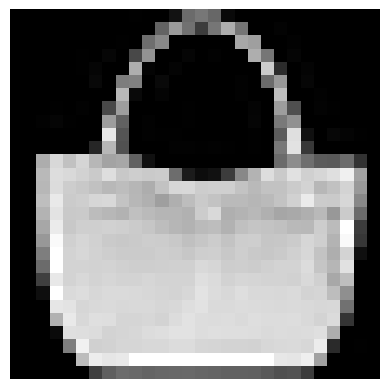

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_images[100], cmap='gray')
plt.axis('off')
plt.show()

##4. Normalize your data (train and test) between 0 and 1.
Hint: This is a grayscale image has pixel values between 0 and 255.

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##5. Now divide the training data into two: 
Validation images (first 5000 images from the initial training data) and Training images (rest of the images in your initial training data).

In [14]:
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

##6. Initialize the weight and bias parameters of your model.


In [15]:
weight_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
bias_init = keras.initializers.Zeros()

##7. Now build the neural network model with the following characteristics:
(a) One Flatten layer as the input layer.
(b) Two dense relu layers as hidden layers.


In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(128, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model with desired loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model on the training data and validate
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5019 - accuracy: 0.8183 - val_loss: 0.4099 - val_accuracy: 0.8524
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3711 - accuracy: 0.8632 - val_loss: 0.3456 - val_accuracy: 0.8752
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3324 - accuracy: 0.8788 - val_loss: 0.3414 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3089 - accuracy: 0.8847 - val_loss: 0.3275 - val_accuracy: 0.8782
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2890 - accuracy: 0.8912 - val_loss: 0.3232 - val_accuracy: 0.8860
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2732 - accuracy: 0.8976 - val_loss: 0.3015 - val_accuracy: 0.8944
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2640 - accuracy: 0.9001 - val_loss: 0.2980 - val_ac

In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy on test data:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3476 - accuracy: 0.8814
Accuracy on test data: 0.8813999891281128


In [21]:
# Predict the target classes for the first five samples of the test data
predictions = model.predict(test_images[:5])
predicted_classes = [class_labels[prediction.argmax()] for prediction in predictions]
actual_classes = [class_labels[label] for label in test_labels[:5]]

1/1 [==============================] - 0s 214ms/step


In [22]:
# Print the actual and predicted target classes
for i in range(5):
    print("Actual:", actual_classes[i], "Predicted:", predicted_classes[i])

Actual: Ankle boot Predicted: Ankle boot
Actual: Pullover Predicted: Pullover
Actual: Trouser Predicted: Trouser
Actual: Trouser Predicted: Trouser
Actual: Shirt Predicted: T-shirt/top
